In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total

In [18]:
print("Dimensioni del dataset:", df.shape)
print("\nMetadati del dataset:")
print(df.info())

Dimensioni del dataset: (429435, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths

In [57]:
columns_to_keep = ["continent", "location", "date", "total_cases", "new_cases", "icu_patients", "hosp_patients"]
df_cleaned = df[columns_to_keep]

df_cleaned.loc[:, "date"] = pd.to_datetime(df_cleaned["date"], errors='coerce')
df_cleaned = df_cleaned[df_cleaned["continent"].notnull()]
df_cleaned = df_cleaned.dropna(subset=["total_cases", "new_cases"])
df_cleaned = df_cleaned.fillna(0).infer_objects(copy=False)

print("Dimensioni del dataset pulito:", df_cleaned.shape)
print("\nPrime 5 righe del dataset pulito:\n", df_cleaned.head())

Dimensioni del dataset pulito: (390071, 7)

Prime 5 righe del dataset pulito:
   continent     location       date  total_cases  new_cases  icu_patients  \
0      Asia  Afghanistan 2020-01-05          0.0        0.0           0.0   
1      Asia  Afghanistan 2020-01-06          0.0        0.0           0.0   
2      Asia  Afghanistan 2020-01-07          0.0        0.0           0.0   
3      Asia  Afghanistan 2020-01-08          0.0        0.0           0.0   
4      Asia  Afghanistan 2020-01-09          0.0        0.0           0.0   

   hosp_patients  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


/var/folders/ww/n5rp5q9s4nj8wqrkfc08c_8h0000gn/T/ipykernel_3620/3291205738.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_cleaned.fillna(0).infer_objects(copy=False)


In [73]:
continent_cases = df_cleaned.groupby("continent")["total_cases"].max().reset_index()
total_cases_world = continent_cases["total_cases"].sum()
continent_cases["percentage_world"] = (continent_cases["total_cases"] / total_cases_world * 100)
print (continent_cases)

       continent  total_cases  percentage_world
0         Africa    4072765.0          1.379413
1           Asia   99373219.0         33.656928
2         Europe   38997490.0         13.208143
3  North America  103436829.0         35.033241
4        Oceania   11861161.0          4.017282
5  South America   37511921.0         12.704993


In [75]:
italy_2022 = df_cleaned[(df_cleaned["location"] == "Italy") & (df_cleaned["date"].dt.year == 2022)]
italy_2022 = italy_2022.dropna(subset=["new_cases"])
print (italy_2022)

       continent location       date  total_cases  new_cases  icu_patients  \
186002    Europe    Italy 2022-01-01    5622431.0        0.0        1297.0   
186003    Europe    Italy 2022-01-02    6267035.0   644604.0        1319.0   
186004    Europe    Italy 2022-01-03    6267035.0        0.0        1351.0   
186005    Europe    Italy 2022-01-04    6267035.0        0.0        1392.0   
186006    Europe    Italy 2022-01-05    6267035.0        0.0        1428.0   
...          ...      ...        ...          ...        ...           ...   
186362    Europe    Italy 2022-12-27   25060503.0        0.0         334.0   
186363    Europe    Italy 2022-12-28   25060503.0        0.0         321.0   
186364    Europe    Italy 2022-12-29   25060503.0        0.0         314.0   
186365    Europe    Italy 2022-12-30   25060503.0        0.0         304.0   
186366    Europe    Italy 2022-12-31   25060503.0        0.0         307.0   

        hosp_patients  
186002        12562.0  
186003        1

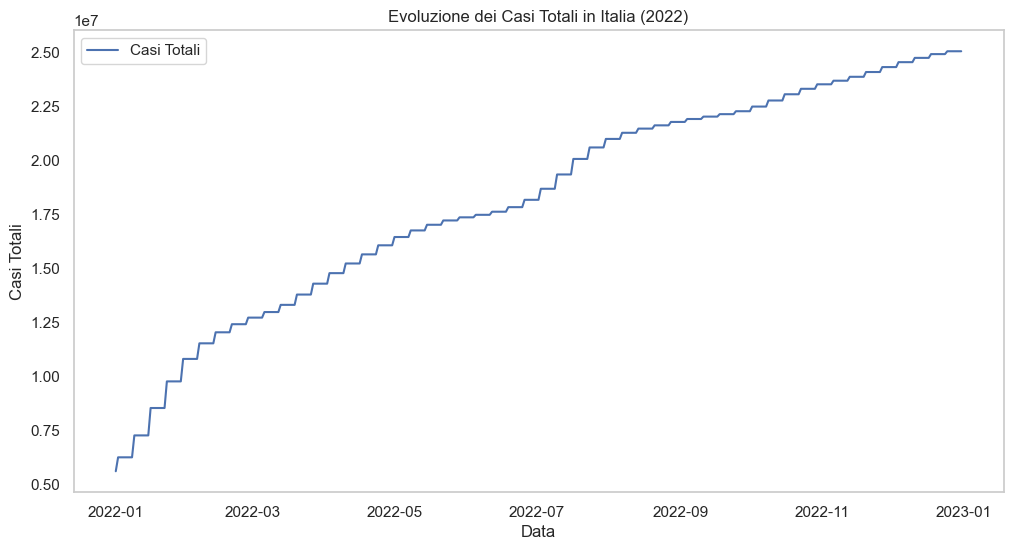

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(italy_2022["date"], italy_2022["total_cases"], label="Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.legend()
plt.grid()
plt.show()

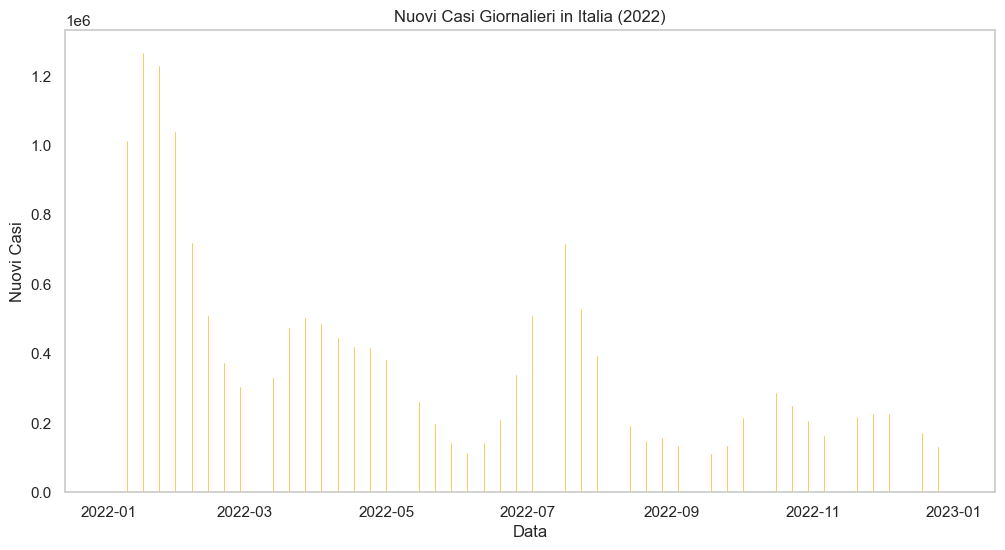

In [65]:
plt.figure(figsize=(12, 6))
plt.bar(italy_2022["date"], italy_2022["new_cases"], color="orange")
plt.title("Nuovi Casi Giornalieri in Italia (2022)")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.grid()
plt.show()

In [77]:
icu_data = df_cleaned[(df_cleaned["location"].isin(["Italy", "Germany", "France"]))
& (df_cleaned["date"] >= "2022-05-01")
& (df_cleaned["date"] <= "2023-04-30")]

print (icu_data)

       continent location       date  total_cases  new_cases  icu_patients  \
131214    Europe   France 2022-05-01   27742592.0   376510.0        1557.0   
131215    Europe   France 2022-05-02   27742592.0        0.0        1511.0   
131216    Europe   France 2022-05-03   27742592.0        0.0        1498.0   
131217    Europe   France 2022-05-04   27742592.0        0.0        1465.0   
131218    Europe   France 2022-05-05   27742592.0        0.0        1447.0   
...          ...      ...        ...          ...        ...           ...   
186482    Europe    Italy 2023-04-26   25772459.0        0.0         100.0   
186483    Europe    Italy 2023-04-27   25772459.0        0.0          99.0   
186484    Europe    Italy 2023-04-28   25772459.0        0.0         105.0   
186485    Europe    Italy 2023-04-29   25772459.0        0.0         111.0   
186486    Europe    Italy 2023-04-30   25795509.0    23050.0         103.0   

        hosp_patients  
131214        23327.0  
131215        2

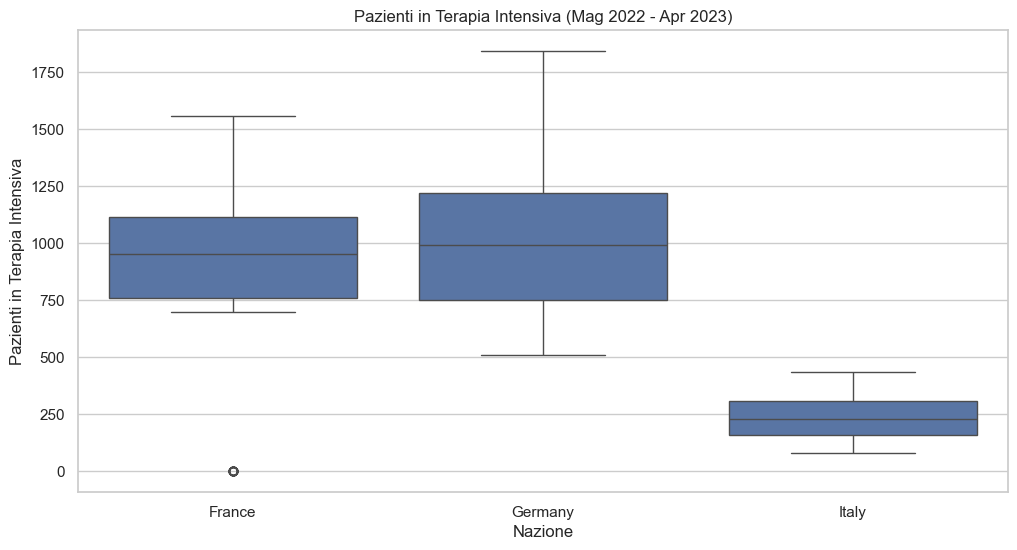

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=icu_data, x="location", y="icu_patients")
plt.title("Pazienti in Terapia Intensiva (Mag 2022 - Apr 2023)")
plt.xlabel("Nazione")
plt.ylabel("Pazienti in Terapia Intensiva")
plt.show()

In [79]:
hosp_2023 = df_cleaned[(df_cleaned["location"].isin(["Italy", "France", "Spain"]))
& (df_cleaned["date"].dt.year == 2023)]

In [81]:
hosp_by_country = hosp_2023.groupby("location")["hosp_patients"].sum().reset_index()

In [89]:
if hosp_by_country["hosp_patients"].isnull().sum() > 0:
    print("Valori mancanti rilevati nei pazienti ospitalizzati.")
else:
    print("Nessun dato mancante nei pazienti ospitalizzati.")

Nessun dato mancante nei pazienti ospitalizzati.


In [91]:
print (hosp_by_country)

  location  hosp_patients
0   France      1382574.0
1    Italy      1175272.0
2    Spain       354602.0
